In [30]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
y = y.values.ravel()
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 



# Para exprotar los datos a un excel
feature_names = breast_cancer_wisconsin_diagnostic.data.feature_names
target_name = breast_cancer_wisconsin_diagnostic.data.target_name

df_X = pd.DataFrame(X, columns=feature_names)
df_y = pd.DataFrame(y, columns=[target_name])

df = pd.concat([df_X, df_y], axis=1)
excel_file = 'breast_cancer_data.xlsx'
df.to_excel(excel_file, index=False)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

Se obtiene los datos para trabajar en los modelos que se aplicarán posteriormente. Así también se crea un excel con la infromación que se trabajará.

In [32]:
# Verificación si hay datos nulos en el DataFrame
nulos = df.isnull().any()
columnas_con_nulos = nulos[nulos].index.tolist()
if columnas_con_nulos:
    print("Columnas con datos nulos:")
    print(columnas_con_nulos)
else:
    print("No hay datos nulos en el DataFrame.")

No hay datos nulos en el DataFrame.


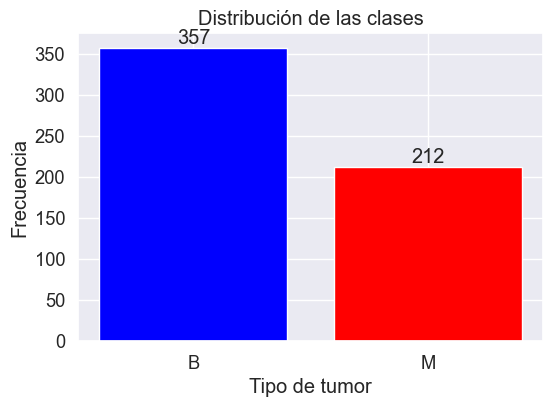

In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

class_counts = np.bincount(y_encoded)
plt.figure(figsize=(6, 4))
bars = plt.bar(range(len(class_counts)), class_counts, color=['blue', 'red'])
plt.title('Distribución de las clases')
plt.xlabel('Tipo de tumor')
plt.ylabel('Frecuencia')
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=0)

for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()

La base en la cual constan la variable "targt" que indican si un tumor es maligno (malignant=212) o benigno (benign=357).

In [6]:
# Realizar¿mos un análisis exploratorio de las otras variables.
print(X.describe())

          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         

Se pudo obtener medidas estadisticas básicas la resto de variables puesto que son datos numéricos.

División de los datos y escalamiento de los mismos

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Dividimos los datos en conjuntos de entrenamiento(train) y prueba(test)
# Esta división servirá para los tres modelos que aplicaremos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### MODELO 1: REGRESIÓN LOGÍSITCA ###

In [39]:
# Entrenamos el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Vamos a evaluar la precisón del modelo y verificar la matriz de confusión tanto para los datos de entrenamiento y prueba

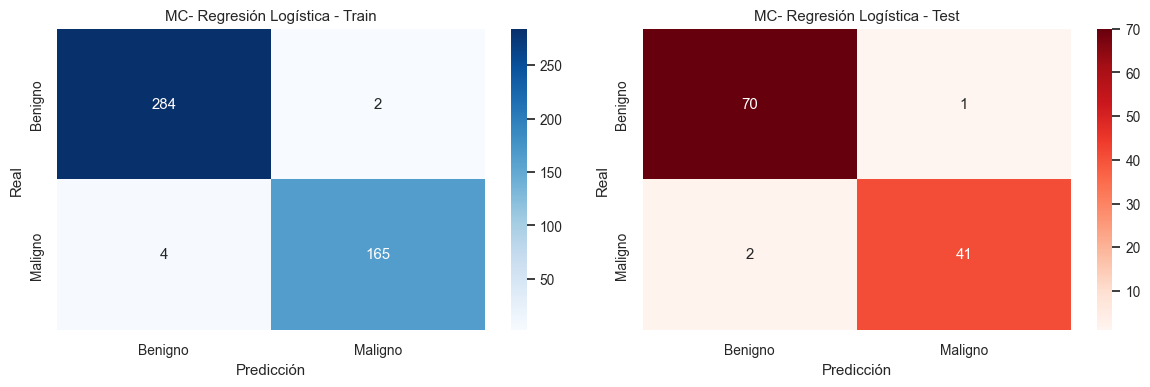

Precisión del modelo en los datos de entrenamiento: 0.9868131868131869
Precisión del modelo en los datos de prueba: 0.9736842105263158


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular la matriz de confusión entrenamiento y prueba
train_predictions_RL = model.predict(X_train_scaled)
test_predictions_RL = model.predict(X_test_scaled)

train_conf_matrix = confusion_matrix(y_train, train_predictions_RL)
test_conf_matrix = confusion_matrix(y_test, test_predictions_RL)

#visualización la matriz de confusión de entrenamiento y prueba
etiqueta = ['Benigno', 'Maligno']
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.set(font_scale=0.9)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('MC- Regresión Logística - Train')

# Visualización de la matriz de confusión de prueba
plt.subplot(1, 2, 2)
sns.set(font_scale=0.9)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('MC- Regresión Logística - Test')

plt.tight_layout()
plt.show()

train_accuracy = accuracy_score(y_train, train_predictions_RL)
print("Precisión del modelo en los datos de entrenamiento:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions_RL)
print("Precisión del modelo en los datos de prueba:", test_accuracy)



### MODELO 2: ARBOL DE DECISIÓN ###

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Creamos el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el clasificador en los datos de entrenamiento
clf.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

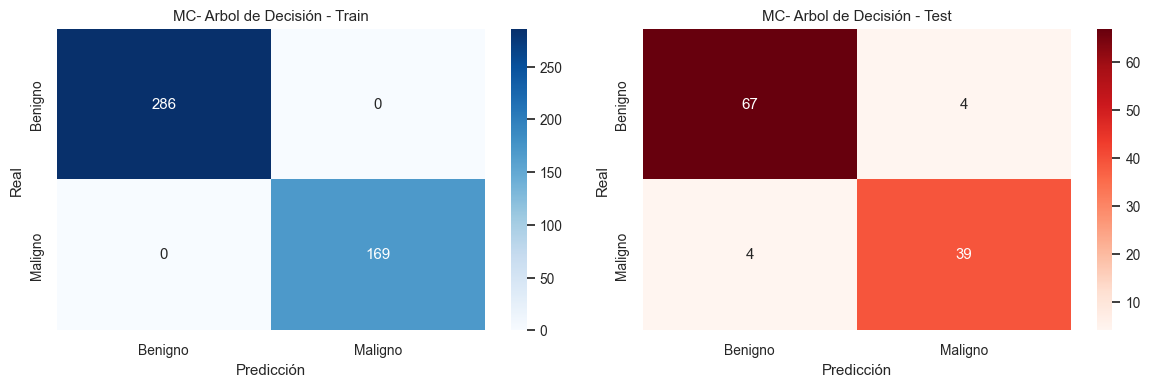

Precisión del modelo en los datos de entrenamiento: 1.0
Precisión del modelo en los datos de prueba: 0.9298245614035088


In [59]:
# Calcular la matriz de confusión entrenamiento y prueba
train_predictions_AD = clf.predict(X_train_scaled)
test_predictions_AD = clf.predict(X_test_scaled)

train_conf_matrix = confusion_matrix(y_train, train_predictions_AD)
test_conf_matrix = confusion_matrix(y_test, test_predictions_AD)

#visualización la matriz de confusión de entrenamiento y prueba
etiqueta = ['Benigno', 'Maligno']
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.set(font_scale=0.9)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('MC- Arbol de Decisión - Train')

# Visualización de la matriz de confusión de prueba
plt.subplot(1, 2, 2)
sns.set(font_scale=0.9)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('MC- Arbol de Decisión - Test')

plt.tight_layout()
plt.show()

train_accuracy = accuracy_score(y_train, train_predictions_AD)
print("Precisión del modelo en los datos de entrenamiento:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions_AD)
print("Precisión del modelo en los datos de prueba:", test_accuracy)


### MODELO 3: MODELO k-NN ###

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Definir el clasificador K-NN
k = 5  # Número de vecinos
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Ajustar el clasificador K-NN a los datos de entrenamiento
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

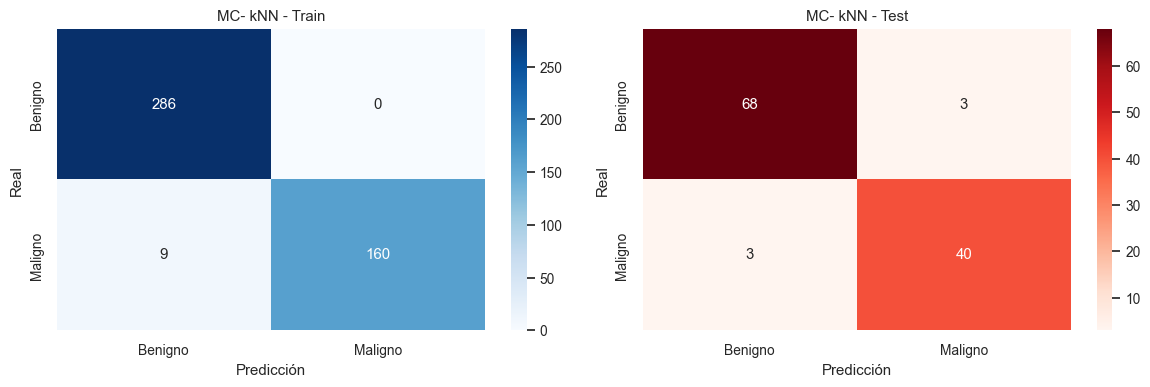

Precisión del modelo en los datos de entrenamiento: 0.9802197802197802
Precisión del modelo en los datos de prueba: 0.9473684210526315


In [64]:
# Calcular la matriz de confusión entrenamiento y prueba
train_predictions_kNN = knn_classifier.predict(X_train_scaled)
test_predictions_kNN = knn_classifier.predict(X_test_scaled)

train_conf_matrix = confusion_matrix(y_train, train_predictions_kNN)
test_conf_matrix = confusion_matrix(y_test, test_predictions_kNN)

#visualización la matriz de confusión de entrenamiento y prueba
etiqueta = ['Benigno', 'Maligno']
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.set(font_scale=0.9)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('MC- kNN - Train')

# Visualización de la matriz de confusión de prueba
plt.subplot(1, 2, 2)
sns.set(font_scale=0.9)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=etiqueta, yticklabels=etiqueta)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('MC- kNN - Test')

plt.tight_layout()
plt.show()

train_accuracy = accuracy_score(y_train, train_predictions_kNN)
print("Precisión del modelo en los datos de entrenamiento:", train_accuracy)
test_accuracy = accuracy_score(y_test, test_predictions_kNN)
print("Precisión del modelo en los datos de prueba:", test_accuracy)
